In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as it
%matplotlib inline

Функция $f(x)$  может быть представлена в виде ряда тригонометрических функций вида:
$$f(x) = a_0 + \sum_{i=1}^{\infty}\left(a_n\sin(nx) + b_n\cos(nx)\right)$$
где $$a_0 = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}f(x)dx$$ $$a_m = \frac{1}{\pi}\int\limits_{-\pi}^{\pi}f(x)\cos(mx)dx$$
$$b_m = \frac{1}{\pi}\int\limits_{-\pi}^{\pi}f(x)\sin(mx)dx$$
В комплексной форме ряд Фурье можно представить как: $$f(x) = \sum\limits_{-\infty}^{+\infty}c_ke^{ikx}dx$$
где $c_k = \frac{1}{2\pi} \int\limits_{-\pi}^{\pi}f(u)e^{-iku}du$ 

In [134]:
def part_sum(f, x, n):
    xn = np.linspace(x[0], x[1], 100)
    rn = np.zeros_like(xn)
    a0 = 1/(2*np.pi)*it.quad(f, x[0], x[1])[0]
    for i in range(1, n+1):
        fa = lambda x: f(x)*np.cos(x * i)
        ai = 1/np.pi * it.quad(fa, x[0], x[1])[0]
        fb = fa = lambda x: f(x)*np.sin(x * i)
        bi = 1/np.pi * it.quad(fb, x[0], x[1])[0]
        rn += bi * np.sin(i*xn) + ai * np.cos(i*xn)
    return (xn, rn + a0)

In [135]:
def check(n):
    s = 0
    xn= np.linspace(0, np.pi * 2)
    for i in range(1, n+1):
        s += np.sin(i*x)/i
    return s

In [114]:
f = lambda x: (np.pi - x)/2

In [153]:
x, y = part_sum(f, x = [0, 2 *np.pi], n = 50)

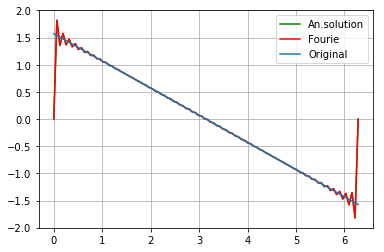

In [154]:
plt.plot(x, check(50), color = 'green', label = 'An.solution')
plt.plot(x, y, color = 'red', label = 'Fourie')
plt.plot(x, f(x), label = 'Original')
plt.legend()
plt.grid()

In [150]:
def generate_batch(x1, x2, f = lambda x: x**2):
    x = part_sum(f, x = [x1, x2], n = 5)[0]
    y = part_sum(f, x = [x1, x2], n = 5)[1]
    plt.plot(x, y, color = 'red', label = 'Fourie')
    plt.plot(x, f(x), label = 'Original')
    plt.legend()
    plt.grid()

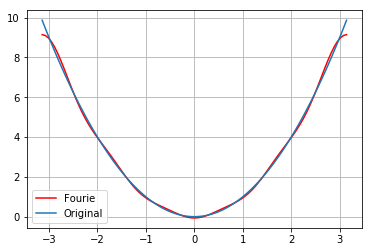

In [151]:
generate_batch(-np.pi, np.pi)